In [44]:
import pandas as pd
import os

# Cambia la carpeta raíz al directorio donde están tus archivos
os.chdir(r'C:\Users\nono_\AppRegresion\data')

# Verifica que el cambio se realizó
print(os.getcwd())

C:\Users\nono_\AppRegresion\data


In [45]:

# Diccionario de marcas y modelos agrupados
marcas_modelos = {
    "chevrolet": ['classic', 'corsa', 'cruze', 'onix', 'prisma', 's10', 'spin', 'tracker'],
    "citroen": ['berlingo', 'c3', 'c3-aircross', 'c3-picasso', 'c4-cactus', 'c4-lounge', 'xsara'],
    "fiat": ['argo', 'cronos', 'palio', 'punto', 'siena', 'strada', 'toro'],
    "ford": ['bronco-sport', 'ecosport', 'f-100', 'fiesta', 'focus-iii', 'ka', 'ranger'],
    "jeep": ['compass', 'grand-cherokee', 'renegade', 'wrangler'],
    "nissan": ['frontier', 'kicks', 'march', 'note', 'sentra', 'tiida', 'versa'],
    "peugeot": ['207', '208', '308', '408', '2008', '3008', 'partner'],
    "renault": ['captur', 'clio', 'duster', 'fluence', 'kangoo', 'kwid', 'logan', 'sandero'],
    "toyota": ['corolla', 'corolla-cross', 'etios', 'hilux', 'rav4', 'sw4', 'yaris'],
    "volkswagen": ['amarok', 'fox', 'gol', 'golf', 'polo', 'suran', 'up', 'vento']
}

carpeta_csv = r'C:\Users\nono_\AppRegresion\data' 
df_final = pd.DataFrame()
for marca, modelos in marcas_modelos.items():
    for modelo in modelos:
        filename = f'autos_{marca}_{modelo}_mercadolibre.csv'
        path_completo = os.path.join(carpeta_csv, filename)
        if os.path.isfile(path_completo):
            df = pd.read_csv(path_completo)
            df['Modelo'] = modelo
            df['Marca'] = marca
            df_final = pd.concat([df_final, df], ignore_index=True)
        else:
            print(f"No se encontró el archivo: {path_completo} para {marca} {modelo}")

df_final = df_final.drop_duplicates()
print(f"Cantidad final de registros juntados: {len(df_final)}")


# Opcional: grabar unido o seguir procesando
df_final.to_csv('autos_unidos.csv', index=False)

Cantidad final de registros juntados: 52713


In [46]:
import unicodedata
# Cargar el CSV
df = pd.read_csv('autos_unidos.csv')

# Función de normalización
def quitar_tildes_y_minusculas(texto):
    if isinstance(texto, str):
        texto = texto.lower()
        texto = unicodedata.normalize('NFKD', texto)
        texto = ''.join([c for c in texto if not unicodedata.combining(c)])
        return texto
    return texto

# Normalizar los valores
df = df.applymap(quitar_tildes_y_minusculas)

# Normalizar los nombres de columna
df.columns = [quitar_tildes_y_minusculas(col) for col in df.columns]
print(df['modelo'].unique())


C:\Users\nono_\AppData\Local\Temp\ipykernel_2620\256475457.py:15: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



['classic' 'corsa' 'cruze' 'onix' 'prisma' 's10' 'spin' 'tracker'
 'berlingo' 'c3' 'c3-aircross' 'c3-picasso' 'c4-cactus' 'c4-lounge'
 'xsara' 'argo' 'cronos' 'palio' 'punto' 'siena' 'strada' 'toro'
 'bronco-sport' 'ecosport' 'f-100' 'fiesta' 'focus-iii' 'ka' 'ranger'
 'compass' 'grand-cherokee' 'renegade' 'wrangler' 'frontier' 'kicks'
 'march' 'note' 'sentra' 'tiida' 'versa' '207' '208' '308' '408' '2008'
 '3008' 'partner' 'captur' 'clio' 'duster' 'fluence' 'kangoo' 'kwid'
 'logan' 'sandero' 'corolla' 'corolla-cross' 'etios' 'hilux' 'rav4' 'sw4'
 'yaris' 'amarok' 'fox' 'gol' 'golf' 'polo' 'suran' 'up' 'vento']


In [47]:

# Obtener la lista de colores únicos
colores_unicos = df['color'].unique()

print(colores_unicos)


['gris' 'plateado' 'negro' 'dorado' 'blanco' 'rojo' 'crema'
 'no disponible' 'azul' 'verde' 'marron' 'beige' 'verde oscuro' 'celeste'
 'violeta' 'gris oscuro' 'gris plata' 'plata' 'bordo' 'naranja' 'amarillo'
 'blano' 'cafe' 'azul claro' 'gris claro' 'blanca' 'otro' 'morado oscuro'
 'rosa' 'grafito' 'a confirmar' 'verde claro' 'negra' 'steel_blue'
 'oferta contado' 'azul oscuro' 'azul marino' 'roja' 'navy_blue'
 'gris grafitto' 'acero' 'scandium' 'blanco perla' 'gris plomo' 'moundaz'
 'morado' 'gris quarzt' 'champagne' 'marron oscuro' 'violeta oscuro'
 'pale_blue' 'blan' 'beige mohave' 'atlantic blue metallic' 'gris indy']


In [48]:
colores_na = ['a confirmar', 'no disponible', 'oferta contado']
df['color'] = df['color'].replace(colores_na, pd.NA)
mapeo_colores = {
    'blanco': ['blanco', 'blanca', 'blan', 'blano', 'blanco perla'],
    'gris': ['gris', 'gris claro', 'gris oscuro', 'gris plata', 'gris plomo', 'gris indy', 'gris quarzt', 'gris grafitto', 'grafito'],
    'negro': ['negro', 'negra'],
    'rojo': ['rojo', 'roja','bordo'],
    'azul': ['azul', 'azul claro', 'azul oscuro', 'azul marino','atlantic blue metallic', 'navyblue', 'celeste','steel_blue', 'navy_blue', 'pale_blue'],
    'marron': ['marron', 'marrn', 'marrn oscuro', 'cafe', 'marron oscuro'],
    'plateado': ['plateado', 'plata', 'acero', 'scandium'],
    'verde': ['verde', 'verde oscuro', 'verde claro'],
    'dorado': ['dorado'],
    'beige': ['beige', 'beige mohave', 'crema','champagne'],
    'morado': ['violeta','morado','morado oscuro','violeta oscuro'],
    'otro': ['otro','naranja','amarillo','rosa','moundaz']
    }

# Invertir el mapeo para que sea más fácil de utilizar
mapeo_colores_invertido = {}
for key, values in mapeo_colores.items():
    for value in values:
        mapeo_colores_invertido[value.lower()] = key

# Aplicar el mapeo a la columna de colores
df['color'] = df['color'].map(mapeo_colores_invertido)


#Imputamos los colores nan por moda de modelo y año
# 1. Imputar por moda de modelo y año
def imputar_por_moda_modeloanio(grupo):
    moda = grupo['color'].mode(dropna=True)
    if not moda.empty:
        return grupo['color'].fillna(moda.iloc[0])
    else:
        return grupo['color']

df['color'] = df.groupby(['modelo', 'ano'], group_keys=False).apply(imputar_por_moda_modeloanio)

# 2. Imputar por moda de modelo (donde siga habiendo NaN)
def imputar_por_moda_modelo(grupo):
    moda = grupo['color'].mode(dropna=True)
    if not moda.empty:
        return grupo['color'].fillna(moda.iloc[0])
    else:
        return grupo['color']

df['color'] = df.groupby('modelo', group_keys=False).apply(imputar_por_moda_modelo)

# Verificar los resultados
print(df['color'].unique())


['gris' 'plateado' 'negro' 'dorado' 'blanco' 'rojo' 'beige' 'azul' 'verde'
 'marron' 'morado' 'otro']


C:\Users\nono_\AppData\Local\Temp\ipykernel_2620\1105529193.py:37: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\nono_\AppData\Local\Temp\ipykernel_2620\1105529193.py:47: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [49]:
# Lista de modelos que normalmente son tracción trasera (rwd) cuando no son 4x4
modelos_trasera = ['s10', 'ranger', 'hilux', 'amarok', 'frontier', 'sw4', 'f-100']

# Función para extraer tracción
def extraer_traccion(version, modelo):
    version = str(version).lower()
    modelo = str(modelo).lower()

    if '4x4' in version:
        return '4x4'
    elif 'awd' in version or 'all wheel drive' in version or '4wd' in version:
        return 'integral'
    elif 'fwd' in version or 'traccion delantera' in version:
        return 'fwd'
    elif 'rwd' in version or 'traccion trasera' in version:
        return 'rwd'
    elif '4x2' in version:
        if modelo in modelos_trasera:
            return 'rwd'
        else:
            return 'fwd'
    else:
        return None  # Dejamos como NaN para imputar después


# Aplicar la función fila por fila
df['traccion'] = df.apply(lambda row: extraer_traccion(row['version'], row['modelo']), axis=1)

# Imputar valores NaN en 'traccion' según si el modelo está en modelos_trasera
df['traccion'] = df.apply(
    lambda row: 'rwd' if pd.isna(row['traccion']) and row['modelo'].lower() in modelos_trasera
    else ('fwd' if pd.isna(row['traccion']) else row['traccion']),
    axis=1
)

print(df['traccion'].unique())


['fwd' '4x4' 'rwd' 'integral']


In [50]:
tipos_combustible_unicos = df['tipo de combustible'].unique()
print(tipos_combustible_unicos)

['nafta/gnc' 'nafta' 'hibrido' 'gnc' 'diesel' 'hibrido/diesel' 'electrico'
 'hibrido/nafta']


In [51]:
mapeo_combustible = {
    'nafta': ['nafta'],
    'nafta/gnc': ['naftagnc', 'nafta/gnc'],
    'hibrido/nafta': ['hbridonafta', 'hibrido','híbrido/nafta'],
    'híbrido/diesel': ['hbridodiesel'],
    'diesel': ['disel', 'diésel'],
    'gnc': ['gnc'],
    'electrico': ['elctrico']
}

for key, values in mapeo_combustible.items():
    df.loc[df['tipo de combustible'].isin(values), 'tipo de combustible'] = key



tipos_combustible_unicos = df['tipo de combustible'].unique()
print(tipos_combustible_unicos)

['nafta/gnc' 'nafta' 'hibrido/nafta' 'gnc' 'diesel' 'hibrido/diesel'
 'electrico']


In [52]:
tipos_puertas_unicos = df['puertas'].unique()
print(tipos_puertas_unicos)

tipos_puertas_unicos = [5]
for valor in tipos_puertas_unicos:
    autos = df[df['puertas'] == valor]
    if not autos.empty:
        print(f"Autos con {valor} puertas:")
        print(autos[['marca', 'modelo', 'puertas']])
        print("\n")
    else:
        print(f"No se encontraron autos con {valor} puertas.\n")

[    4     5     3     2 18500 60441 60258 60252     6     1     7    43]
Autos con 5 puertas:
            marca   modelo  puertas
14      chevrolet  classic        5
16      chevrolet  classic        5
17      chevrolet  classic        5
25      chevrolet  classic        5
53      chevrolet  classic        5
...           ...      ...      ...
52647  volkswagen    vento        5
52649  volkswagen    vento        5
52663  volkswagen    vento        5
52675  volkswagen    vento        5
52682  volkswagen    vento        5

[30076 rows x 3 columns]




In [53]:
df['puertas'] = df['puertas'].apply(lambda x: 4 if x == 5 else (2 if x == 3 else x))
#Modelos especificos con problemas en numero de puertas
df.loc[(df['marca'] == 'renault') & (df['modelo'] == 'kangoo'), 'puertas'] = 5
df.loc[(df['marca'] == 'peugeot') & (df['modelo'] == 'partner'), 'puertas'] = 5
df.loc[df['modelo'] == 'sw4', 'puertas'] = 5 #pasa a 5 desde 7 algunas personan consideran el tragaluz como puerta
df.loc[41385, 'puertas'] = 4 #Etios sedan aparecia con 6 puertas
df.loc[45059, 'puertas'] = 4 #Amarok sedan aparecia con 6 puertas
df.loc[49592, 'puertas'] = 4 #polo sedan aparecia con 6 puertas
df.loc[10964, 'puertas'] = 4 #cronos
df.loc[12923, 'puertas'] = 4 #strada
df.loc[20746, 'puertas'] = 4 #ranger
df.loc[24477, 'puertas'] = 4 #note
df.loc[25412, 'puertas'] = 4 #207
df.loc[43132 , 'puertas'] = 4 #rav4
df.loc[45324, 'puertas'] = 4 #rav4
df.loc[48320, 'puertas'] = 4 #gol
df.loc[47170, 'puertas'] = 4 #gol
df.loc[49955, 'puertas'] = 4 #suran
df.loc[51136, 'puertas'] = 4 #up
tipos_puertas_unicos = df['puertas'].unique()
print(tipos_puertas_unicos)

[4 2 5]


In [54]:
tipos_transmision_unicos = df['transmision'].unique()
print(tipos_transmision_unicos)
no_disponibles = df[df['transmision'] == 'no disponible'].shape[0]
print(f"Hay {no_disponibles} transmisiones no disponibles")

['manual' 'no disponible' 'automatica' 'automatica secuencial'
 'semiautomatica']
Hay 516 transmisiones no disponibles


In [55]:
df['transmision'] = df['transmision'].apply(lambda x: 'manual' if x == 'manual' else 'automatica' if x in ['automatica', 'automatica secuencial', 'semiautomatica'] else 'no disponible')

#extraigo de version la transmision
def extraer_transmision(row):
    if row['transmision'] != 'no disponible':
        return row['transmision']
    
    version = row['version'].lower()
    
    if any(x in version for x in ['mt', 'manual', 'm/t']):
        return 'manual'
    elif any(x in version for x in ['at', 'automatica', 'auto', 'cvt']):
        return 'automatica'
    else:
        return 'no disponible'
#para las 430 que aun no tiene transmision asignada, le asigno la moda del modelo del año

for modelo in df['modelo'].unique():
    for año in df['ano'].unique():
        filtro = (df['modelo'] == modelo) & (df['ano'] == año) & (df['transmision'] == 'no disponible')
        if filtro.any():
            moda = df[(df['modelo'] == modelo) & (df['ano'] == año)]['transmision'].mode().iloc[0]
            df.loc[filtro, 'transmision'] = moda

#para las 16 restantes le asigna moda por modelo
for modelo in df['modelo'].unique():
    filtro = (df['modelo'] == modelo) & (df['transmision'] == 'no disponible')
    if filtro.any():
        moda = df[df['modelo'] == modelo]['transmision'].mode().iloc[0]
        df.loc[filtro, 'transmision'] = moda

df['transmision'] = df.apply(extraer_transmision, axis=1)
tipos_transmision_unicos = df['transmision'].unique()
print(tipos_transmision_unicos)



['manual' 'automatica']


In [56]:
motores_unicos = df['motor'].unique()
print(motores_unicos)

['1.4' '1.6' '1' 'aa 1.4n' 'no disponible' '1400' '1.8' '1.7' '2.0'
 '1.4 nafta' '1.0' 'turboalimentado' '1.4 t' '1.4t' '1.4 turbo'
 '1.4 (turbo)' '1,4 turbo' 'chevrolet cruze cruze 4p 1.4t lt mt'
 '1.4 turbo 153 cv' 'inyeccion multi punto' '1.4 151cv'
 'chevrolet cruze ii 1.4 t lt mt' '1.4 turbk' '1.4 turbo - ecotec'
 '1.8 16 valvulas' '1,4 t ltz plus a/t'
 'motor 1.0 nafta turbo 116cv 160 nm' '1.2' '1.0t' '1.0 turbo' '98 hp'
 '1.4l' '1.4 ecotec' '2.8' '2.8 turbo diesel 200cv' '2.2' 'mwm' '2.8 tdi'
 '2.8 200 cv' '2.5' '2.5 maxion' 'maxion 2.5' '1.3' '1.8 105cv' '1.3 td'
 '1.2t' '1.2 turbo' '1,8' '1.6 hdi' '1.9' 'hdi' '1.5' '1.6 vti' '1,6'
 '1;6' '1.0 t200' 'n1.6 16v' '1.6 16 v' 'vti 115' '1.6v' '1.6 thp' '1.6t'
 '1.6 thp 165 hp' '16' '1200' '1.6 vti 115' '1.6 turbo' '1.6 thp, turbo'
 '1.6 l' '2' '1,6 hdi' '1.6 thp turbo' 'hdi 1.6' '1.6. hdi' '1.6n'
 '1300 c3' '1.6 16v' 'palio ex fire 16v' '1.2 mpi 16 v' '1.3 turbo diesel'
 '1.6 16 valvulas' 'naftero' 'fire 1.4' 'n1.4' 'turbo diesel in

In [57]:
import re
import pandas as pd

def extraer_valor(x):
    match = re.search(r'(\d+\.\d+|\d+,\d+)', str(x))
    if match:
        return float(str(match.group()).replace(',', '.'))
    return None

df['cilindrada'] = df['motor'].apply(extraer_valor)

# Si no se encontró cilindrada en la columna 'motor', intentar extraer de la columna 'version'
df.loc[df['cilindrada'].isna(), 'cilindrada'] = df[df['cilindrada'].isna()]['version'].apply(extraer_valor)

rangos_cilindradas = {
    'classic': (1.0, 1.8),
    'corsa': (1.0, 2.0),
    'cruze': (1.4, 2.0),
    'onix': (1.0, 1.8),
    'prisma': (1.0, 1.4),
    's10': (2.0, 2.8),                  # Naftera y diesel
    'spin': (1.3, 1.8),
    'tracker': (1.2, 1.8),
    'berlingo': (1.4, 1.9),
    'c3': (1.2, 1.6),
    'c3-aircross': (1.0, 1.6),
    'c3-picasso': (1.5, 1.6),
    'c4-cactus': (1.2, 1.6),
    'c4-lounge': (1.6, 2.0),
    'xsara': (1.6, 2.0),
    'argo': (1.3, 1.8),
    'cronos': (1.3, 1.8),
    'palio': (1.0, 1.8),
    'punto': (1.0, 1.8),
    'siena': (1.0, 1.8),
    'strada': (1.3, 1.8),
    'toro': (1.2, 2.4),
    'bronco-sport': (1.5, 2.0),
    'ecosport': (1.0, 2.0),
    'f-100': (2.0, 5.0),
    'fiesta': (1.0, 2.0),
    'focus-iii': (1.6, 2.0),
    'ka': (1.0, 1.6),
    'ranger': (2.0, 3.2),               # Diesel y naftera vieja
    'compass': (1.3, 2.4),
    'grand-cherokee': (2.4, 6.4),
    'renegade': (1.3, 2.4),
    'wrangler': (3.6, 6.4),
    'frontier': (2.0, 2.8),
    'kicks': (1.6, 1.6),
    'march': (1.5, 1.6),
    'note': (1.6, 1.6),
    'sentra': (1.6, 2.0),
    'tiida': (1.8, 1.8),
    'versa': (1.6, 1.6),
    '207': (1.4, 2.0),
    '208': (1.0, 1.6),
    '308': (1.6, 2.0),
    '408': (1.6, 2.0),
    '2008': (1.0, 1.6),
    '3008': (1.6, 2.0),
    'partner': (1.4, 2.4),
    'captur': (1.0, 2.0),
    'clio': (1.0, 2.0),
    'duster': (1.3, 2.0),
    'fluence': (1.6, 2.0),
    'kangoo': (1.2, 2.2),
    'kwid': (1.0, 1.0),
    'logan': (1.0, 1.6),
    'sandero': (1.0, 2.0),
    'corolla': (1.3, 2.0),              # Incluyendo versiones viejas y modernas
    'corolla-cross': (1.8, 2.0),        # Solo reciente en Argentina
    'etios': (1.3, 1.6),
    'hilux': (2.4, 4.0),
    'rav4': (1.8, 2.5),
    'sw4': (1.8, 4.0),
    'yaris': (1.3, 1.8),
    'amarok': (1.8, 3.2),
    'fox': (1.0, 1.9),
    'gol': (1.0, 2.0),
    'golf': (1.4, 2.8),
    'polo': (1.0, 2.0),
    'suran': (1.6, 1.9),
    'up': (1.0, 1.0),
    'vento': (1.4, 2.5)
}


def verificar_cilindrada(row):
    modelo = row['modelo']
    cilindrada = row['cilindrada']
    if modelo in rangos_cilindradas:
        rango = rangos_cilindradas[modelo]
        if cilindrada < rango[0] or cilindrada > rango[1]:
            return False
    else:
        return False
    return True

df['en_rango'] = df.apply(verificar_cilindrada, axis=1)

moda_cilindrada = df[df['en_rango'] == True].groupby(['modelo', 'ano'])['cilindrada'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None).to_dict()

for index, row in df[df['cilindrada'].isna()].iterrows():
    modelo = row['modelo']
    ano = row['ano']
    if (modelo, ano) in moda_cilindrada:
        df.loc[index, 'cilindrada'] = moda_cilindrada[(modelo, ano)]

no_en_rango = df[df['en_rango'] == False]
for index in no_en_rango.index:
    modelo = df.loc[index, 'modelo']
    ano = df.loc[index, 'ano']
    if (modelo, ano) in moda_cilindrada:
        df.loc[index, 'cilindrada'] = moda_cilindrada[(modelo, ano)]

df.loc[42175, 'cilindrada'] = 3.0

df['en_rango'] = df.apply(verificar_cilindrada, axis=1)

moda_por_modelo = df['cilindrada'].groupby(df['modelo']).apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None).to_dict()

for index, row in df[df['cilindrada'].isna()].iterrows():
    modelo = row['modelo']
    if modelo in moda_por_modelo:
        df.loc[index, 'cilindrada'] = moda_por_modelo[modelo]

df['en_rango'] = df.apply(verificar_cilindrada, axis=1)

no_en_rango = df[df['en_rango'] == False]
df['motor'] = df['cilindrada']
df = df.drop(columns=['cilindrada'], errors='ignore')
print(df['motor'].unique())
df = df.drop(columns=['en_rango'])


[1.4 1.6 1.8 1.7 2.  1.  1.2 2.8 2.2 2.5 1.3 1.9 1.5 3.6 4.3 4.9 4.2 3.9
 5.  4.  3.  3.2 2.3 2.4 6.4 2.7 6.1 4.7 5.2 5.7 3.1 3.8 1.1]


In [58]:
print(df['tipo de carroceria'].unique())

['sedan' 'hatchback' 'coupe' 'no disponible' 'furgon' 'rural' 'pick-up'
 'monovolumen' 'suv' 'cabriolet' 'light truck' 'off-road' 'van' 'minivan'
 'crossover' 'roadster']


In [59]:
categoria_agrupada = {
    'sedan': 'sedan',
    'hatchback': 'hatchback',
    'coupe': 'coupe',
    'no disponible': 'no disponible',
    'furgon': 'furgon',
    'pick-up': 'pick-up',
    'monovolumen': 'monovolumen',
    'suv': 'suv',
    'crossover': 'suv',
    'cabriolet': 'cabriolet',
    'rural': 'monovolumen',
    'minivan': 'monovolumen',
    'van': 'van',
    'off-road': 'off-road',
    'light truck': 'pick-up',
    'roadster': 'cabriolet'
}
df.loc[3450, 'tipo de carroceria'] = 'hatchback'
df.loc[12834, 'tipo de carroceria'] = 'sedan'
df.loc[22851, 'tipo de carroceria'] = 'off-road'
df.loc[23250, 'tipo de carroceria'] = 'off-road'
df.loc[32036, 'tipo de carroceria'] = 'furgon'  # Peugeot Partner
df.loc[41553, 'tipo de carroceria'] = 'hatchback'  # Toyota Etios
df.loc[44290, 'tipo de carroceria'] = 'hatchback'  # Toyota Yaris
df.loc[47015, 'tipo de carroceria'] = 'hatchback'  # Volkswagen Fox
df.loc[48399, 'tipo de carroceria'] = 'hatchback'  # Volkswagen Gol
df['tipo de carroceria'] = df['tipo de carroceria'].map(categoria_agrupada)

mapeo_carroceria = {
    'classic': 'sedan',
    'corsa': ['hatchback', 'sedan'],
    'cruze': ['sedan', 'hatchback'],
    'onix': ['hatchback', 'sedan'],
    'prisma': 'sedan',
    's10': 'pick-up',
    'spin': 'monovolumen',
    'tracker': 'suv',
    'berlingo': ['furgon', 'monovolumen'],
    'c3': 'hatchback',
    'c3-aircross': 'suv',
    'c3-picasso': 'monovolumen',
    'c4-cactus': 'hatchback',
    'c4-lounge': 'sedan',
    'xsara': ['hatchback', 'sedan'],
    'argo': 'hatchback',
    'cronos': 'sedan',
    'palio': ['hatchback', 'sedan'],
    'punto': 'hatchback',
    'siena': 'sedan',
    'strada': 'pick-up',
    'toro': 'pick-up',
    'bronco-sport': 'suv',
    'ecosport': 'suv',
    'f-100': 'pick-up',
    'fiesta': ['hatchback', 'sedan'],
    'focus-iii': ['hatchback', 'sedan'],
    'ka': ['hatchback', 'sedan'],
    'ranger': 'pick-up',
    'compass': 'suv',
    'grand-cherokee': ['suv', 'off-road'],
    'renegade': 'suv',
    'wrangler': 'off-road',
    'frontier': 'pick-up',
    'kicks': 'suv',
    'march': 'hatchback',
    'note': ['hatchback', 'monovolumen'],
    'sentra': 'sedan',
    'tiida': ['sedan', 'hatchback'],
    'versa': ['sedan', 'hatchback'],
    '207': ['hatchback', 'cabriolet', 'sedan'],
    '208': 'hatchback',
    '308': ['hatchback', 'cabriolet', 'sedan'],
    '408': 'sedan',
    '2008': 'suv',
    '3008': 'suv',
    'partner': 'furgon',
    'captur': 'suv',
    'clio': 'hatchback',
    'duster': 'suv',
    'fluence': 'sedan',
    'kangoo': ['furgon', 'monovolumen'],
    'kwid': 'hatchback',
    'logan': 'sedan',
    'sandero': 'hatchback',
    'corolla': 'sedan',
    'corolla-cross': 'suv',
    'etios': ['sedan', 'hatchback'],
    'hilux': 'pick-up',
    'rav4': 'suv',
    'sw4': 'suv',
    'yaris': ['hatchback', 'sedan'],
    'amarok': 'pick-up',
    'fox': 'hatchback',
    'gol': 'hatchback',
    'golf': ['hatchback', 'cabriolet'],
    'polo': 'hatchback',
    'suran': 'monovolumen',
    'up': 'hatchback',
    'vento': 'sedan'
}


# Paso 1: Aplicar el mapeo de categorías agrupadas
df['tipo de carroceria'] = df['tipo de carroceria'].map(categoria_agrupada)

# Paso 2: Imputar "no disponible" por la moda del tipo de carrocería por modelo y año
filtro_no_disponible = df['tipo de carroceria'] == 'no disponible'

for modelo in df.loc[filtro_no_disponible, 'modelo'].unique():
    df_modelo = df[df['modelo'] == modelo]
    for ano in df_modelo['ano'].unique():
        subset = df_modelo[(df_modelo['ano'] == ano) & (df_modelo['tipo de carroceria'] != 'no disponible')]
        if not subset.empty:
            moda = subset['tipo de carroceria'].mode().iloc[0]
            df.loc[
                (df['modelo'] == modelo) & 
                (df['ano'] == ano) & 
                (df['tipo de carroceria'] == 'no disponible'), 
                'tipo de carroceria'
            ] = moda

# Paso 3: Corregir modelos con un único tipo válido
def corregir_tipo_carroceria(row):
    tipos_validos = mapeo_carroceria.get(row['modelo'], [])
    if not isinstance(tipos_validos, list):
        tipos_validos = [tipos_validos]
    
    if row['tipo de carroceria'] not in tipos_validos and len(tipos_validos) == 1:
        return tipos_validos[0]
    
    return row['tipo de carroceria']

df['tipo de carroceria'] = df.apply(corregir_tipo_carroceria, axis=1)

# Paso 4: Imputar según la moda del tipo válido por modelo y año para los casos restantes inválidos
def tipo_valido(row):
    return row['tipo de carroceria'] in mapeo_carroceria.get(row['modelo'], [])

filtro_invalido = ~df.apply(tipo_valido, axis=1)

for modelo in df.loc[filtro_invalido, 'modelo'].unique():
    df_modelo = df[df['modelo'] == modelo]
    for ano in df_modelo['ano'].unique():
        subset = df_modelo[(df_modelo['ano'] == ano) & df_modelo.apply(tipo_valido, axis=1)]
        if not subset.empty:
            moda = subset['tipo de carroceria'].mode().iloc[0]
            df.loc[
                (df['modelo'] == modelo) & 
                (df['ano'] == ano) & 
                (~df.apply(tipo_valido, axis=1)), 
                'tipo de carroceria'
            ] = moda

df.loc[(df['modelo'] == 'xsara') & (df['tipo de carroceria'] == 'monovolumen') & (df['puertas'] == 2), 'tipo de carroceria'] = 'hatchback'
df.loc[(df['modelo'] == 'xsara') & (df['tipo de carroceria'] == 'monovolumen') & (df['puertas'] == 4), 'tipo de carroceria'] = 'sedan'

# Crear un diccionario con imputaciones manuales
carrocerias_dict = {
    17414: 'sedan',         # Ford Focus III Ghia -> típico sedán
    17683: 'sedan',         # Ford Focus III DCI -> sedán
    18050: 'sedan',         # Ford Focus III Ghia TDCI -> sedán
    19319: 'hatchback',     # Ford Ka 2022 -> hatchback
    49179: 'hatchback'      # VW Golf 2022 -> hatchback
}

# Reemplazar los valores en el DataFrame
for idx, tipo in carrocerias_dict.items():
    df.loc[idx, 'tipo de carroceria'] = tipo


In [60]:
import numpy as np
import pandas as pd

# Convierte a numérico con errores coaccionados a NaN
df['kilometros'] = df['kilometros'].str.replace('km', '').str.replace('.', '')
df['kilometros'] = pd.to_numeric(df['kilometros'], errors='coerce')


In [61]:
print(df['kilometros'].describe())


count    5.271300e+04
mean     1.092870e+05
std      1.561276e+05
min      3.000000e+01
25%      6.500000e+04
50%      1.000000e+05
75%      1.400000e+05
max      2.800000e+07
Name: kilometros, dtype: float64


In [62]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# --------------------------------------
# Paso 1: Asignar NaN a valores atípicos o erróneos en 'kilometros'
# --------------------------------------
#HAY UN SW4 del 99 con sospechosamente bajos KM que no toma el codigo
# Valores bajos sospechosos (<9000) para autos hasta 2023
df.loc[(df['kilometros'] < 9000) & (df['ano'] <= 2023), 'kilometros'] = np.nan
# Asignar NaN a valores atípicos (>1,000,000 km)
df.loc[df['kilometros'] > 1000000, 'kilometros'] = np.nan


# Contar filas antes de aplicar NaN
total_filas = len(df)

# Función que devuelve un mask booleano de valores válidos dentro de IQR*2.5
def dentro_de_iqr(x, factor=1.5):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR
    return x.between(lower, upper)

# Aplicar la función por grupo y obtener un mask global
mask_valido = df.groupby(['ano', 'modelo'])['kilometros'] \
                .transform(lambda s: dentro_de_iqr(s, factor=1.5))

# Contar cuántos serán convertidos a NaN
filas_afectadas = (~mask_valido).sum()

# Marcar esos outliers como NaN en la columna 'kilometros'
df.loc[~mask_valido, 'kilometros'] = np.nan

# Informar
print(f"Se aplicaron NaN a {filas_afectadas} valores de 'kilometros' (de un total de {total_filas}).")
print("Valores NaN en 'kilometros' tras el marcado:", df['kilometros'].isna().sum())


# --------------------------------------
# Paso 2: Imputación MICE (IterativeImputer) con BayesianRidge por defecto
# --------------------------------------

# Variables a usar en la imputación
vars_para_imputar = ['kilometros', 'modelo', 'ano', 'marca', 'motor', 'tipo de carroceria']

# Copiar datos y convertir categóricas a dummies
df_imputacion = df[vars_para_imputar].copy()
categoricas = ['modelo', 'marca', 'tipo de carroceria']
df_imputacion = pd.get_dummies(df_imputacion, columns=categoricas, drop_first=True)

# Guardar índices con NaN antes de imputar
indices_nan_km = df[df['kilometros'].isna()].index

# Aplicar imputación
imputer = IterativeImputer(random_state=42, max_iter=1000)
df_imputado_array = imputer.fit_transform(df_imputacion)

# Reconstruir DataFrame imputado
df_imputado = pd.DataFrame(df_imputado_array, columns=df_imputacion.columns, index=df_imputacion.index)

# Asignar solo los valores imputados a las posiciones NaN originales
df.loc[indices_nan_km, 'kilometros'] = df_imputado.loc[indices_nan_km, 'kilometros']

# --------------------------------------
# Paso 3: Verificación
# --------------------------------------

print("\nResumen estadístico de los valores imputados:")
print(df.loc[indices_nan_km, 'kilometros'].describe())

print(df_imputado['kilometros'].describe())

Se aplicaron NaN a 2156 valores de 'kilometros' (de un total de 52713).
Valores NaN en 'kilometros' tras el marcado: 2156

Resumen estadístico de los valores imputados:
count      2156.000000
mean     104163.214168
std       57812.080184
min       14825.249685
25%       62828.201946
50%       95139.466308
75%      133335.146418
max      409847.215857
Name: kilometros, dtype: float64
count     52713.000000
mean     105057.187862
std       58152.228627
min          30.000000
25%       65300.000000
50%       99000.000000
75%      137000.000000
max      800000.000000
Name: kilometros, dtype: float64


In [63]:
import re
import pandas as pd

def convertir_fecha_publicacion(fecha):
    try:
        fecha = fecha.lower().replace(',', '').replace('.', '')
        numero = int(re.findall(r'\d+', fecha)[0])
        if 'dia' in fecha or 'dias' in fecha:
            return numero
        elif 'mes' in fecha or 'meses' in fecha:
            return numero * 30
        elif 'ano' in fecha or 'anos' in fecha or 'ano' in fecha :
            return numero * 365
        else:
            return None
    except:
        return None

df['fecha publicacion'] = df['fecha publicacion'].apply(convertir_fecha_publicacion)

#elimino las 201 observaciones con fechas de publicacion mayor a 365 dias
df = df[df['fecha publicacion'] <= 365]


In [64]:
#SOBRE EL PRECIO para valores menores a 600000 asumimos que estan en dolares, si de casualidad hay algun auto que valia menos de 600000 ARS 
# sera eliminado como outlier
print((df['precio'] < 600000).sum())
valor_dolar = 1195

# Conversión de dolares a pesos argentinos
df.loc[df['precio'] < 600000, 'precio'] = df.loc[df['precio'] < 600000, 'precio'] * valor_dolar

#Luego considerando que los modelos mas caros de tope de gama pueden ser ford ranger raptor, jeep grand cherokee y toyota hilux srx el mas caro que existe en ML es 125000 USD 
# este sera el punto de corte para tratar como outlier por arriba

# Contar cuántos precios son mayores a 150.000.000
precios_mayores = df[df['precio'] > 150000000].shape[0]
print(f"Hay {precios_mayores} precios mayores a 150.000.000")

# Eliminar los precios mayores a 150.000.000
df = df[df['precio'] <= 150000000]


19952
Hay 11 precios mayores a 150.000.000


In [65]:
#SOBRE EL MINIMO PRECIO, ELIMINO VALORES MENORES A 4000000, 
num_precios_menores = df[df['precio'] < 4000000].shape[0]
print(f"Hay {num_precios_menores} precios menores a 4.000.000")

porcentaje_eliminado = (126 / df.shape[0]) * 100
print(f"Eliminar los precios menores a 4 millones implica eliminar el {porcentaje_eliminado:.2f}% de los registros")
df = df[df['precio'] >= 4000000]

Hay 130 precios menores a 4.000.000
Eliminar los precios menores a 4 millones implica eliminar el 0.24% de los registros


C:\Users\nono_\AppData\Local\Temp\ipykernel_2620\1200158077.py:62: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

C:\Users\nono_\AppData\Local\Temp\ipykernel_2620\1200158077.py:66: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



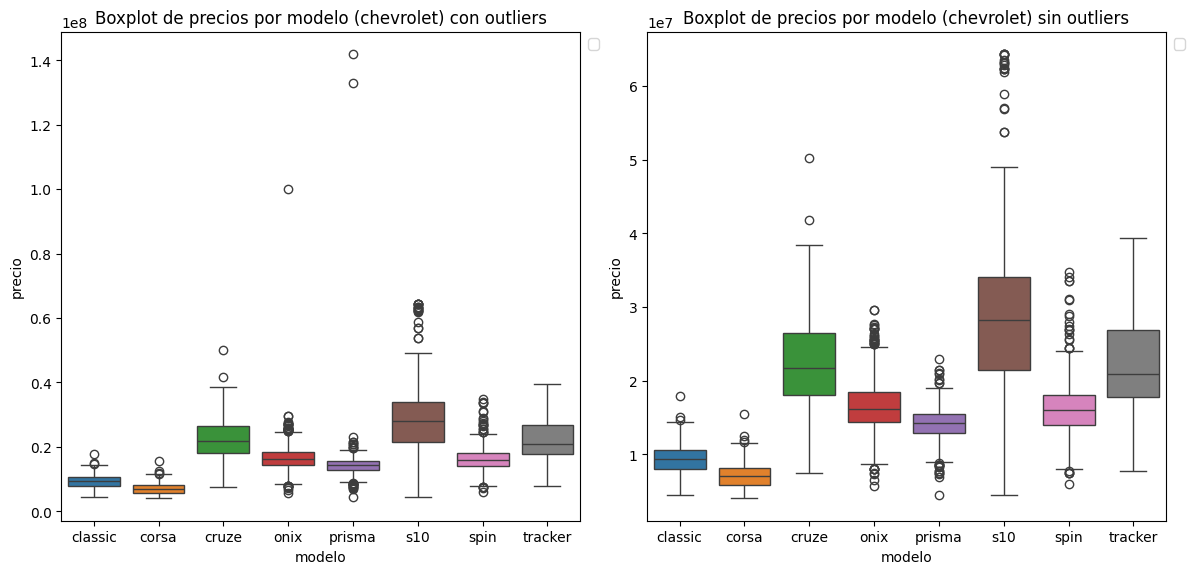

C:\Users\nono_\AppData\Local\Temp\ipykernel_2620\1200158077.py:62: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

C:\Users\nono_\AppData\Local\Temp\ipykernel_2620\1200158077.py:66: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



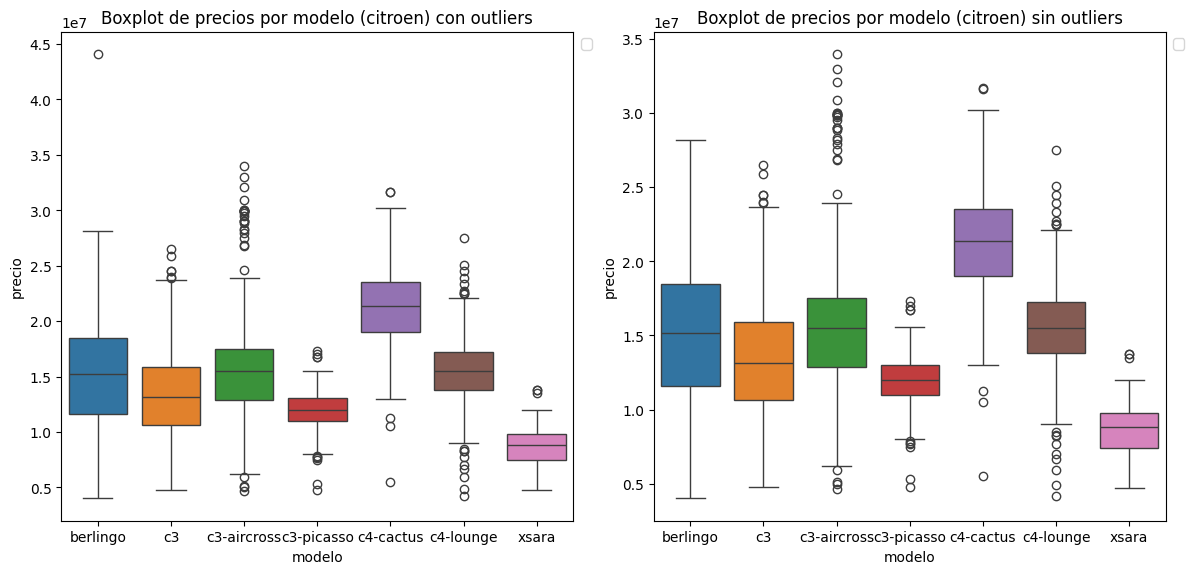

C:\Users\nono_\AppData\Local\Temp\ipykernel_2620\1200158077.py:62: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

C:\Users\nono_\AppData\Local\Temp\ipykernel_2620\1200158077.py:66: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



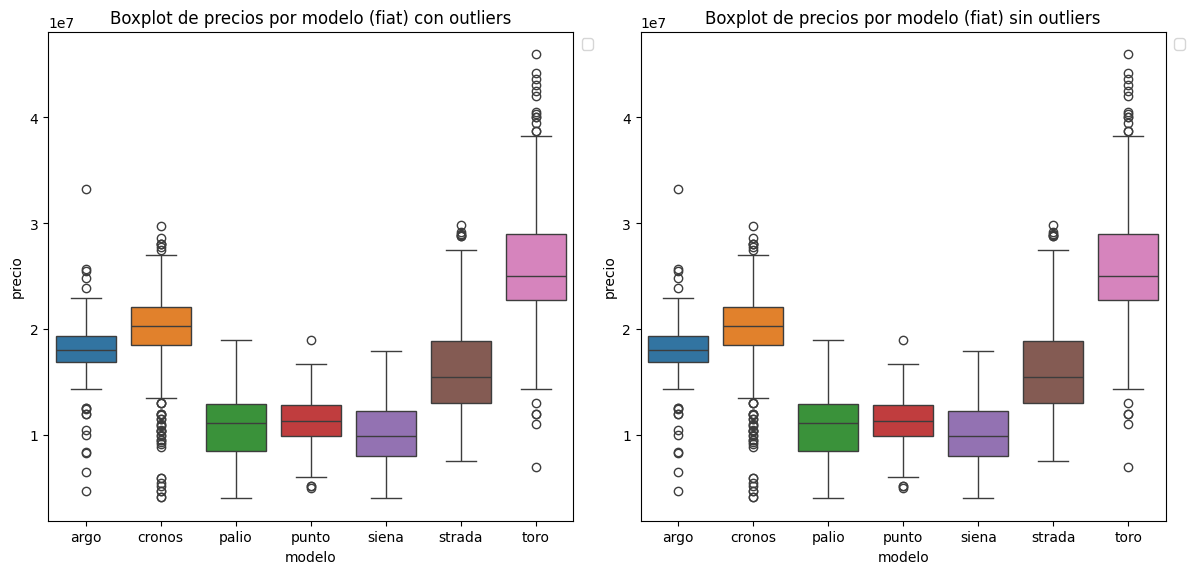

C:\Users\nono_\AppData\Local\Temp\ipykernel_2620\1200158077.py:62: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

C:\Users\nono_\AppData\Local\Temp\ipykernel_2620\1200158077.py:66: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



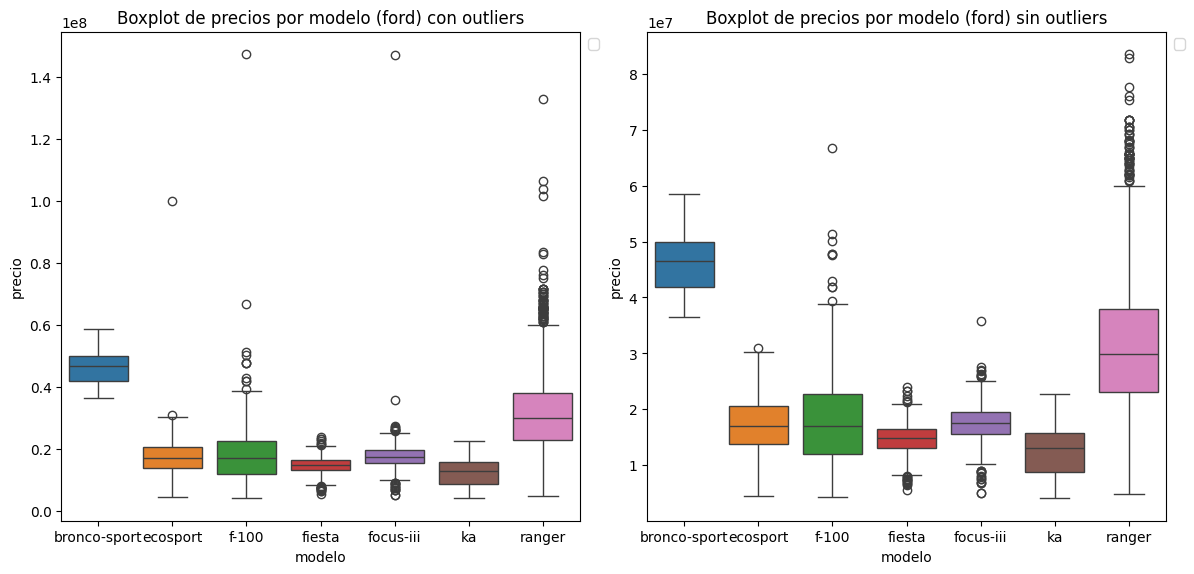

C:\Users\nono_\AppData\Local\Temp\ipykernel_2620\1200158077.py:62: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

C:\Users\nono_\AppData\Local\Temp\ipykernel_2620\1200158077.py:66: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



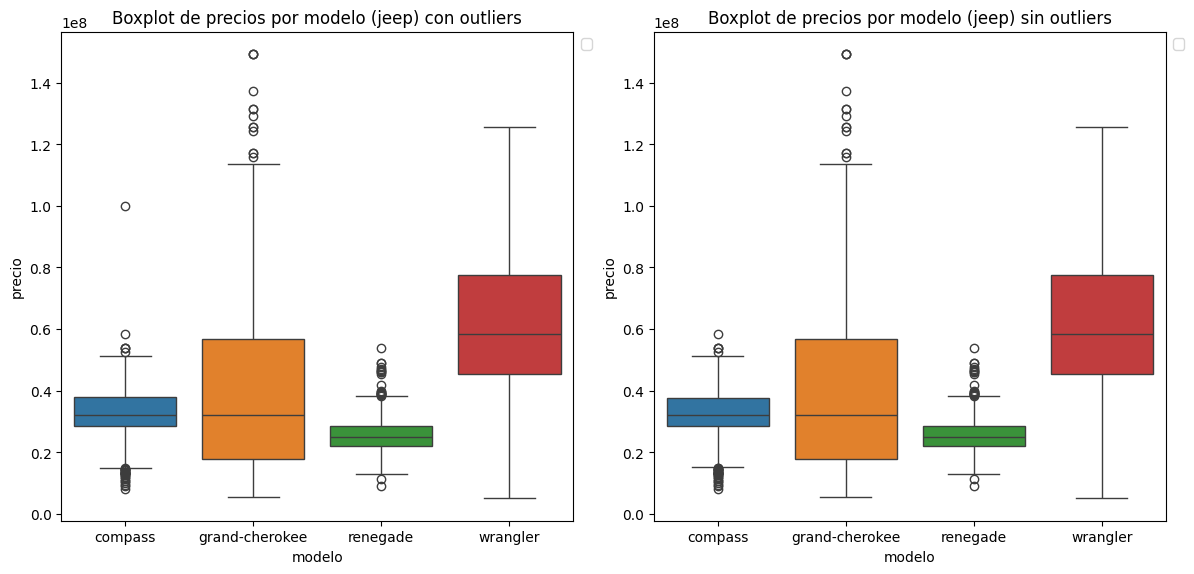

C:\Users\nono_\AppData\Local\Temp\ipykernel_2620\1200158077.py:62: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

C:\Users\nono_\AppData\Local\Temp\ipykernel_2620\1200158077.py:66: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



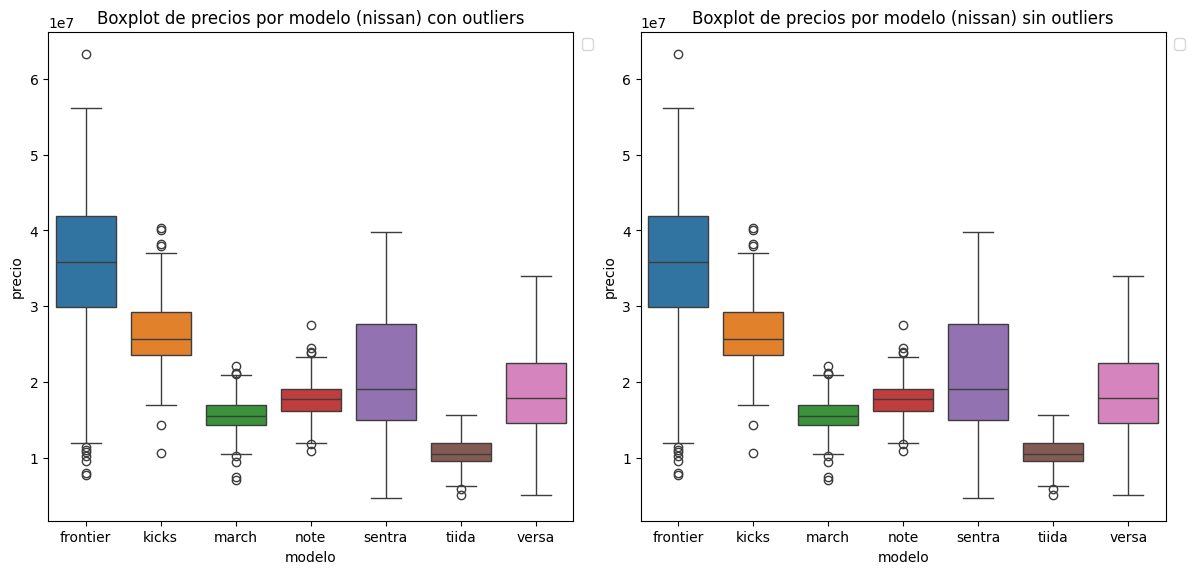

C:\Users\nono_\AppData\Local\Temp\ipykernel_2620\1200158077.py:62: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

C:\Users\nono_\AppData\Local\Temp\ipykernel_2620\1200158077.py:66: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



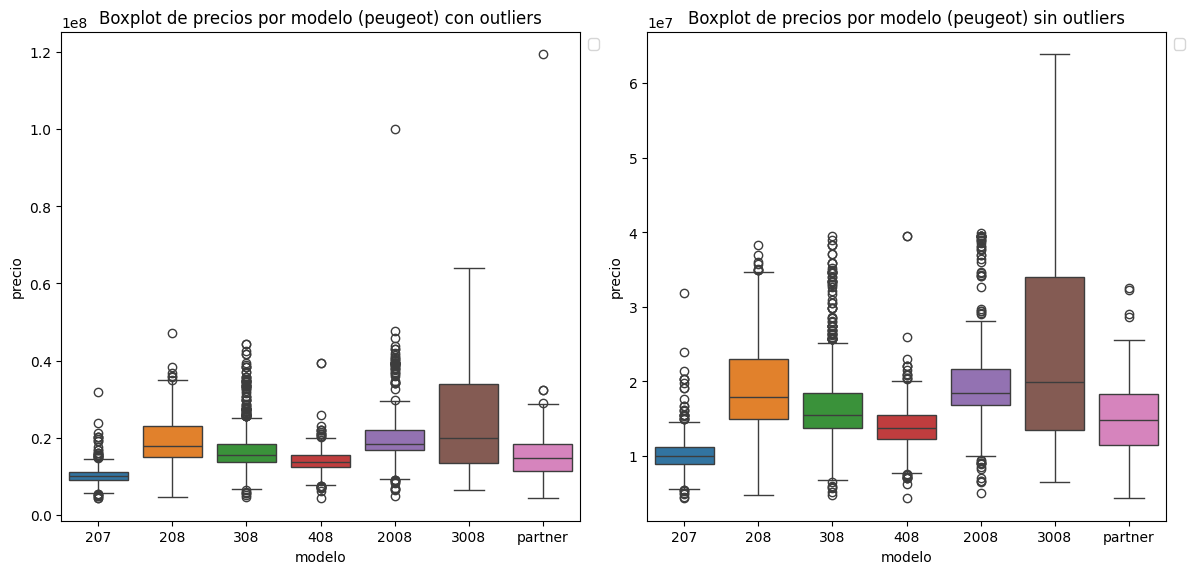

C:\Users\nono_\AppData\Local\Temp\ipykernel_2620\1200158077.py:62: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

C:\Users\nono_\AppData\Local\Temp\ipykernel_2620\1200158077.py:66: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



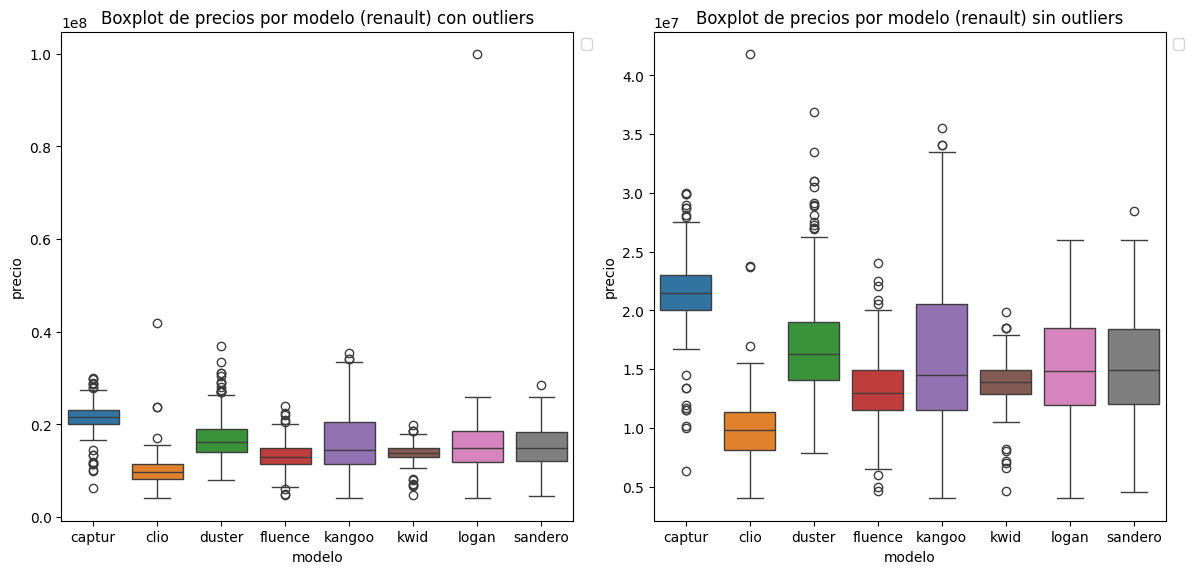

C:\Users\nono_\AppData\Local\Temp\ipykernel_2620\1200158077.py:62: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

C:\Users\nono_\AppData\Local\Temp\ipykernel_2620\1200158077.py:66: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



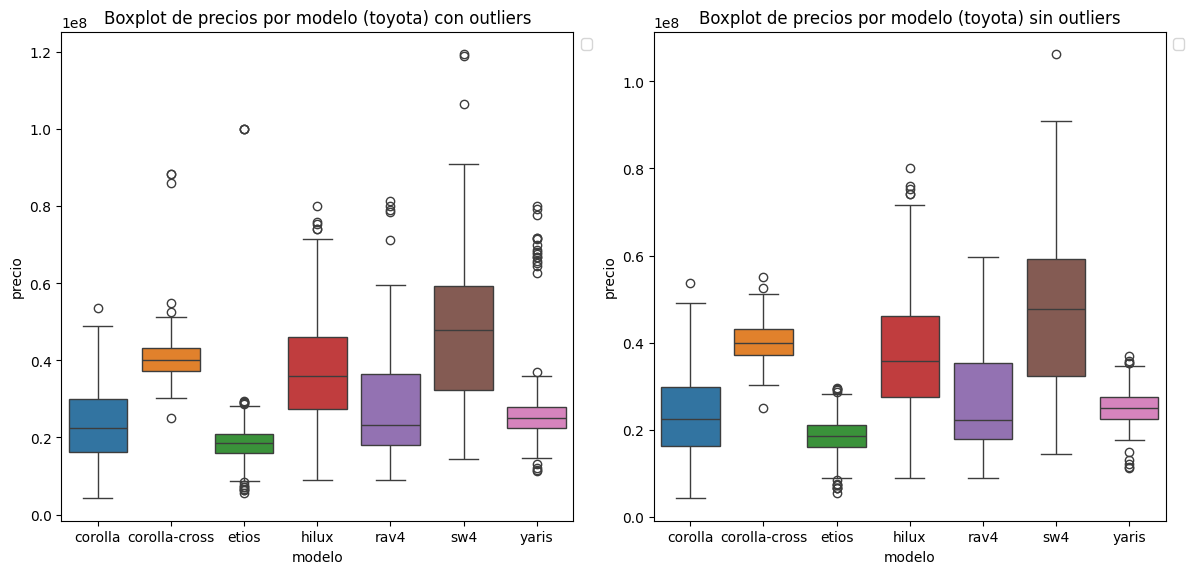

C:\Users\nono_\AppData\Local\Temp\ipykernel_2620\1200158077.py:62: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

C:\Users\nono_\AppData\Local\Temp\ipykernel_2620\1200158077.py:66: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



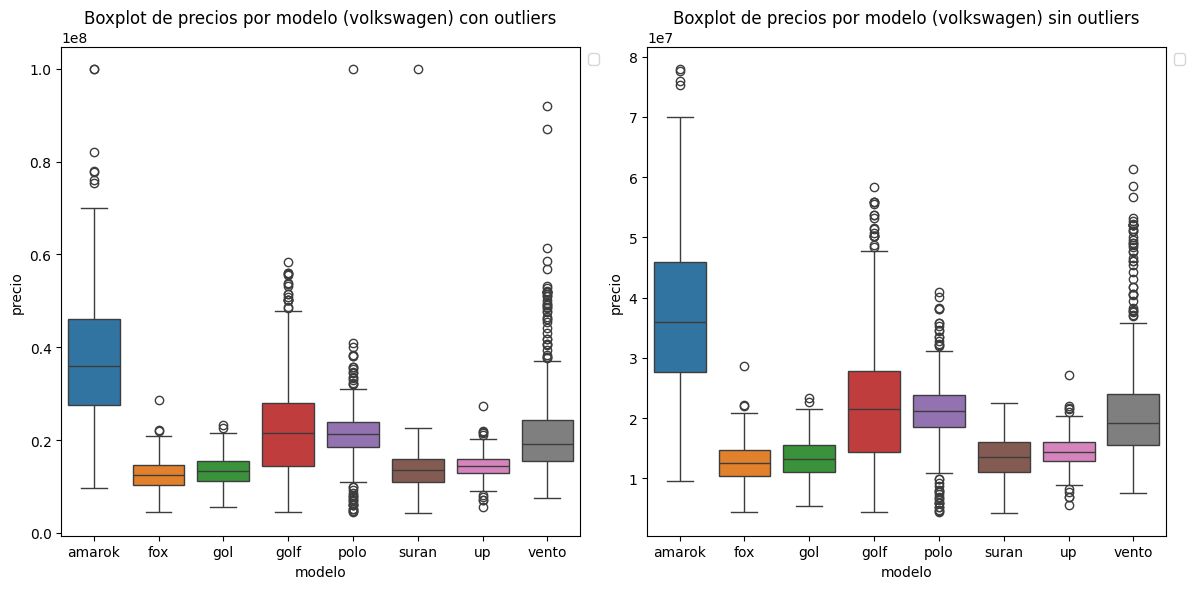

In [66]:

import plotly.express as px
import webbrowser
import os

# Función para cargar datos y eliminar outliers
def cargar_datos(df):
    df_original = df.copy()

    # Chevrolet
    df = df[~((df['marca'] == 'chevrolet') & (df['precio'] > 80000000))]

    # Citroen
    df = df[~((df['marca'] == 'citroen') & (df['precio'] > 40000000))]

    # Ford
    df = df[~((df['marca'] == 'ford') & (df['precio'] > 85000000))]

    # Jeep
    df = df[~((df['marca'] == 'jeep') & (df['modelo'] == 'compass') & (df['precio'] > 80000000))]

    # Peugeot
    df = df[~((df['marca'] == 'peugeot') & (df['precio'] > 80000000))]
    df = df[~((df['marca'] == 'peugeot') & (
        (df['modelo'] == '2008') | 
        (df['modelo'] == '408') | 
        (df['modelo'] == '208') | 
        (df['modelo'] == '308')
    ) & (df['precio'] > 40000000))]

    # Renault
    df = df[~((df['marca'] == 'renault') & (df['precio'] > 60000000))]

    # Toyota
    df = df[~((df['marca'] == 'toyota') & (
        (df['modelo'] == 'corolla-cross') & (df['precio'] > 60000000) |
        (df['modelo'] == 'etios') & (df['precio'] > 80000000) |
        (df['modelo'] == 'rav4') & (df['precio'] > 70000000) |
        (df['modelo'] == 'sw4') & (df['precio'] > 110000000) |
        (df['modelo'] == 'yaris') & (df['precio'] > 60000000)
    ))]

    # Volkswagen
    df = df[~((df['marca'] == 'volkswagen') & (df['precio'] > 80000000))]

    return df_original, df

import seaborn as sns
import matplotlib.pyplot as plt

# Función para crear gráficos
def crear_graficos(df_original, df):
    marcas = df_original['marca'].unique()

    for marca in marcas:
        df_marca_original = df_original[df_original['marca'] == marca]
        df_marca = df[df['marca'] == marca]

        fig, axes = plt.subplots(1, 2, figsize=(12, 6))

        sns.boxplot(x='modelo', y='precio', hue='modelo', data=df_marca_original, ax=axes[0])
        axes[0].set_title(f'Boxplot de precios por modelo ({marca}) con outliers')
        axes[0].legend(loc='upper right', bbox_to_anchor=(1.05, 1))

        sns.boxplot(x='modelo', y='precio', hue='modelo', data=df_marca, ax=axes[1])
        axes[1].set_title(f'Boxplot de precios por modelo ({marca}) sin outliers')
        axes[1].legend(loc='upper right', bbox_to_anchor=(1.05, 1))

        plt.tight_layout()
        plt.show()

# Main
def main(df):
    df_original, df = cargar_datos(df)
    crear_graficos(df_original, df)

# Ejecuta el main
main(df)

In [67]:
import pandas as pd

# Guardamos la cantidad original de filas
filas_antes = len(df)

# Función que elimina outliers por grupo usando el método IQR
def quitar_outliers(grupo):
    Q1 = grupo['precio'].quantile(0.25)
    Q3 = grupo['precio'].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return grupo[(grupo['precio'] >= limite_inferior) & (grupo['precio'] <= limite_superior)]

# Agrupar por modelo y año, aplicar la función, y reescribir df directamente
df = df.groupby(['modelo', 'ano'], group_keys=False).apply(quitar_outliers)

# Reportar cuántas filas se eliminaron
filas_despues = len(df)
filas_eliminadas = filas_antes - filas_despues

print(f"Se eliminaron {filas_eliminadas} filas con outliers en 'precio', considerando cada combinación de modelo y año.")


Se eliminaron 2089 filas con outliers en 'precio', considerando cada combinación de modelo y año.


C:\Users\nono_\AppData\Local\Temp\ipykernel_2620\3185291722.py:16: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [68]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display, clear_output

def data_point_remover(df, x_col='ano', y_col='precio', model_col='modelo'):
    """
    Visualiza un modelo a la vez, detecta outliers y permite eliminar cualquier punto con clics.
    Incluye líneas de umbral para outliers y funcionalidad para eliminar todos los outliers a la vez.
    """
    # Crear copias para trabajar
    df_original = df.copy()
    df_working = df.copy()
    removed_points = []
    
    # Lista de modelos
    models = sorted(df[model_col].unique())
    
    # Widgets de información
    info = widgets.HTML("<h3>Eliminador de Puntos</h3><p>Haz clic en cualquier punto (azul o rojo) para eliminarlo</p>")
    status = widgets.HTML(f"<b>Estado:</b> {len(df_working)} registros, 0 eliminados")
    
    # Selector de modelos
    model_select = widgets.Dropdown(
        options=models,
        value=models[0] if models else None,
        description='Modelo:',
        style={'description_width': 'initial'}
    )
    
    # Área para mostrar el gráfico
    plot_output = widgets.Output()
    
    # Función para detectar outliers y calcular umbrales
    def detect_outliers_and_thresholds(model_df):
        # Crear copia y añadir columna para outliers
        df_result = model_df.copy()
        df_result['es_outlier'] = False
        
        # Crear DataFrames para almacenar los umbrales
        thresholds = []
        
        # Para cada año del modelo
        for year in sorted(df_result[x_col].unique()):
            year_data = df_result[df_result[x_col] == year]
            
            # Inicializar umbrales
            lower_bound = np.nan
            upper_bound = np.nan
            
            # Solo calcular outliers si hay suficientes datos
            if len(year_data) >= 4:
                q1 = year_data[y_col].quantile(0.25)
                q3 = year_data[y_col].quantile(0.75)
                iqr = q3 - q1
                lower_bound = q1 - 1.5 * iqr
                upper_bound = q3 + 1.5 * iqr
                
                # Marcar outliers
                for idx in year_data.index:
                    if year_data.loc[idx, y_col] < lower_bound or year_data.loc[idx, y_col] > upper_bound:
                        df_result.loc[idx, 'es_outlier'] = True
            
            # Guardar umbrales para este año
            thresholds.append({
                'year': year,
                'lower_bound': lower_bound,
                'upper_bound': upper_bound
            })
        
        # Convertir a DataFrame
        thresholds_df = pd.DataFrame(thresholds)
        
        return df_result, thresholds_df
    
    # Función para crear el gráfico
    def update_plot():
        # Limpiar el área de visualización
        plot_output.clear_output(wait=True)
        
        # Obtener el modelo seleccionado
        selected_model = model_select.value
        
        # Filtrar datos para este modelo
        model_data = df_working[df_working[model_col] == selected_model].copy()
        
        # Si no hay datos, mostrar mensaje
        if len(model_data) == 0:
            with plot_output:
                print(f"No hay datos para el modelo {selected_model}")
            return
        
        # Detectar outliers y obtener umbrales
        model_data, thresholds_df = detect_outliers_and_thresholds(model_data)
        
        # Convertir precios a millones
        model_data['precio_millones'] = model_data[y_col] / 1000000
        
        # Convertir umbrales a millones
        thresholds_df['lower_bound_m'] = thresholds_df['lower_bound'] / 1000000
        thresholds_df['upper_bound_m'] = thresholds_df['upper_bound'] / 1000000
        
        # Crear figura
        fig = go.Figure()
        
        # Añadir datos normales (azul)
        normal_data = model_data[~model_data['es_outlier']]
        fig.add_trace(go.Scatter(
            x=normal_data[x_col],
            y=normal_data['precio_millones'],
            mode='markers',
            marker=dict(color='blue', size=10),
            name='Normal',
            customdata=normal_data.index,
            hovertemplate='Año: %{x}<br>Precio: %{y:.2f}M<br>ID: %{customdata}<extra></extra>'
        ))
        
        # Añadir outliers (rojo)
        outliers = model_data[model_data['es_outlier']]
        if len(outliers) > 0:
            fig.add_trace(go.Scatter(
                x=outliers[x_col],
                y=outliers['precio_millones'],
                mode='markers',
                marker=dict(color='red', size=12, symbol='circle-open'),
                name='Outlier',
                customdata=outliers.index,
                hovertemplate='Año: %{x}<br>Precio: %{y:.2f}M<br>ID: %{customdata}<extra></extra>'
            ))
        
        # Añadir línea de umbral superior
        fig.add_trace(go.Scatter(
            x=thresholds_df['year'],
            y=thresholds_df['upper_bound_m'],
            mode='lines',
            line=dict(color='red', width=2, dash='dash'),
            name='Umbral Superior',
            hovertemplate='Año: %{x}<br>Umbral: %{y:.2f}M<extra></extra>'
        ))
        
        # Añadir línea de umbral inferior
        fig.add_trace(go.Scatter(
            x=thresholds_df['year'],
            y=thresholds_df['lower_bound_m'],
            mode='lines',
            line=dict(color='red', width=2, dash='dash'),
            name='Umbral Inferior',
            hovertemplate='Año: %{x}<br>Umbral: %{y:.2f}M<extra></extra>'
        ))
        
        # Configuración básica
        fig.update_layout(
            title=f"Modelo: {selected_model}",
            xaxis_title="Año",
            yaxis_title="Precio (millones)",
            height=500,
            width=800,
            clickmode='event+select'
        )
        
        # Añadir años como ticks específicos
        years = sorted(model_data[x_col].unique())
        fig.update_xaxes(
            tickmode='array',
            tickvals=years,
            ticktext=[str(y) for y in years]
        )
        
        # Mostrar gráfico
        with plot_output:
            # Crear un widget de figura para capturar clics
            fig_widget = go.FigureWidget(fig)
            
            # Función para manejar clics
            def on_click(trace, points, selector):
                if len(points.point_inds) > 0:
                    # Obtener índice del punto
                    idx = points.point_inds[0]
                    point_id = trace.customdata[idx]
                    
                    # Eliminar del DataFrame
                    nonlocal df_working, removed_points
                    removed_points.append(point_id)
                    df_working = df_working.drop(point_id)
                    
                    # Actualizar estado
                    status.value = f"<b>Estado:</b> {len(df_working)} registros, {len(removed_points)} eliminados"
                    
                    # Actualizar gráfico
                    update_plot()
            
            # Asignar manejador de clics solo a las trazas con puntos (no a las líneas)
            for i, trace in enumerate(fig_widget.data):
                # Las dos primeras trazas son puntos, las otras dos son líneas
                if i < 2:  # Solo asignar a los puntos
                    trace.on_click(on_click)
            
            display(fig_widget)
            
        # Guardar los outliers detectados para acceso global
        model_data_with_outliers = model_data
        return model_data
    
    # Función para cambiar de modelo
    def on_model_change(change):
        if change['type'] == 'change' and change['name'] == 'value':
            update_plot()
    
    # Registrar el callback
    model_select.observe(on_model_change, names='value')
    
    # Botones de acción
    def undo_last(b):
        nonlocal df_working, removed_points
        if removed_points:
            # Recuperar último punto eliminado
            last_idx = removed_points.pop()
            row_to_restore = df_original.loc[[last_idx]]
            
            # Añadir de nuevo al DataFrame
            df_working = pd.concat([df_working, row_to_restore])
            
            # Actualizar estado
            status.value = f"<b>Estado:</b> {len(df_working)} registros, {len(removed_points)} eliminados"
            
            # Actualizar gráfico
            update_plot()
    
    def save_data(b):
        message.clear_output()
        with message:
            print(f"DataFrame guardado con {len(df_working)} filas ({len(df_original) - len(df_working)} puntos eliminados)")
        
        # Guardar en variable global
        global clean_df
        clean_df = df_working.copy()
        
        # Reemplazar directamente el DataFrame original (variable global df)
        global df
        df = df_working.copy()
    
    def reset_all(b):
        nonlocal df_working, removed_points
        df_working = df_original.copy()
        removed_points = []
        
        # Actualizar estado
        status.value = f"<b>Estado:</b> {len(df_working)} registros, 0 eliminados"
        
        # Actualizar gráfico
        update_plot()
        
        # Limpiar mensajes
        message.clear_output()
    
    # Nueva función para eliminar todos los outliers del modelo actual
    def remove_all_outliers(b):
        nonlocal df_working, removed_points
        
        # Obtener el modelo seleccionado
        selected_model = model_select.value
        
        # Filtrar datos para este modelo
        model_data = df_working[df_working[model_col] == selected_model].copy()
        
        # Detectar outliers
        model_data_with_outliers, _ = detect_outliers_and_thresholds(model_data)
        
        # Obtener índices de outliers
        outlier_indices = model_data_with_outliers[model_data_with_outliers['es_outlier']].index.tolist()
        
        if outlier_indices:
            # Agregar a la lista de puntos eliminados
            removed_points.extend(outlier_indices)
            
            # Eliminar del DataFrame
            df_working = df_working.drop(outlier_indices)
            
            # Actualizar estado
            status.value = f"<b>Estado:</b> {len(df_working)} registros, {len(removed_points)} eliminados"
            
            # Actualizar mensaje
            message.clear_output()
            with message:
                print(f"Eliminados {len(outlier_indices)} outliers del modelo {selected_model}")
            
            # Actualizar gráfico
            update_plot()
        else:
            message.clear_output()
            with message:
                print(f"No se detectaron outliers en el modelo {selected_model}")
    
    # Crear botones
    undo_btn = widgets.Button(description="Deshacer", icon="undo")
    save_btn = widgets.Button(description="Guardar", icon="save")
    reset_btn = widgets.Button(description="Reiniciar", icon="refresh")
    remove_outliers_btn = widgets.Button(
        description="Eliminar Outliers", 
        icon="trash",
        button_style='danger',
        tooltip='Eliminar todos los outliers del modelo actual'
    )
    
    # Asignar callbacks
    undo_btn.on_click(undo_last)
    save_btn.on_click(save_data)
    reset_btn.on_click(reset_all)
    remove_outliers_btn.on_click(remove_all_outliers)
    
    # Área para mensajes
    message = widgets.Output()
    
    # Botones para navegar entre modelos
    def prev_model(b):
        current_idx = models.index(model_select.value)
        if current_idx > 0:
            model_select.value = models[current_idx - 1]
    
    def next_model(b):
        current_idx = models.index(model_select.value)
        if current_idx < len(models) - 1:
            model_select.value = models[current_idx + 1]
    
    prev_btn = widgets.Button(description="← Anterior", layout=widgets.Layout(width='100px'))
    next_btn = widgets.Button(description="Siguiente →", layout=widgets.Layout(width='100px'))
    
    prev_btn.on_click(prev_model)
    next_btn.on_click(next_model)
    
    # Organizar la interfaz
    model_nav = widgets.HBox([prev_btn, model_select, next_btn])
    buttons = widgets.HBox([undo_btn, save_btn, reset_btn, remove_outliers_btn])
    
    # Variable global para guardar el DataFrame limpio
    global clean_df
    clean_df = None
    
    # Función para obtener el DataFrame limpio
    def get_clean_df():
        return df_working.copy() if clean_df is None else clean_df
    
    # Crear dashboard
    dashboard = widgets.VBox([
        info,
        status,
        model_nav,
        buttons,
        plot_output,
        message
    ])
    
    # Crear el gráfico inicial
    update_plot()
    
    # Añadir método para obtener DataFrame limpio
    dashboard.get_clean_df = get_clean_df
    
    return dashboard

In [69]:
# Crear el dashboard (con el nombre correcto de la función)
dashboard = data_point_remover(df)

# Mostrar el dashboard
display(dashboard)

# Después de eliminar outliers y hacer clic en "Guardar":
clean_df = dashboard.get_clean_df()
df=clean_df

In [70]:
# Lista de índices a eliminar dado el dashboard anterior
indices_a_eliminar = [9390, 9164, 32571, 33447, 9969, 47470, 49179, 32052, 49575, 12899]

# Eliminación de las filas
df = df.drop(indices_a_eliminar, errors='ignore')

# (Opcional) Resetear el índice si ya no quieres conservar los antiguos
df = df.reset_index(drop=True)

print(f"Nuevo tamaño del DataFrame: {df.shape[0]} filas.")




Nuevo tamaño del DataFrame: 50272 filas.


In [71]:
df['kilometros'] = df['kilometros'].astype(int)
df.drop('version', axis=1, inplace=True)

# Guardado del DataFrame
df.to_csv(r'C:\Users\nono_\AppRegresion\data\autos_limpios.csv', index=False)


